# Classifying Defects in Magnetic Tiles
#### Erin Sawyer, Kevin Anderson. Samuel Chen, Qingqing Sun, Zixuan Huang

Image processing using neural networks can be a useful tool for manufacturers! In this project, we will be classifying magnetic tiles based on their defects, if they have one at all. 

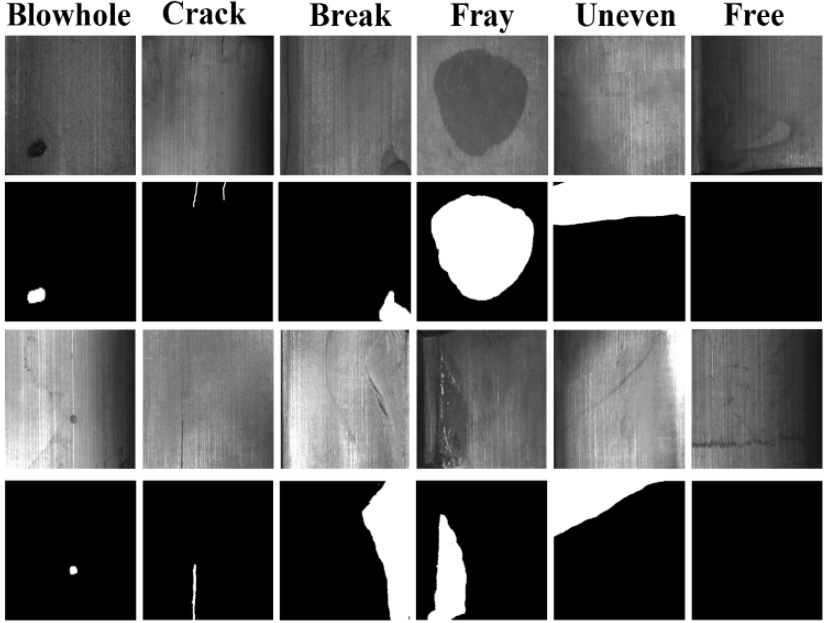

## 1.Imports and format png files

We used the binary color versions of these pictures for classification.

In [1]:
#importing all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as image 
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

Because we started with a dataset of just images, we had to process them, bringing them in and assigning them labels. To do this, we will follow the path to our directory of images, and iterate ethrough each folder, bringing them into our notebook.

The codes below will catch the file path on your device:

In [7]:
#Making a list of the folders/categories to iterate through
Categories = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"] #file names

 Also, we can make a dictionary, this will make numerical labels makes more sense.

In [28]:
values = ["Blowhole", "Break", "Crack", "Fray", "Free", "Uneven"]
keys = [0,1,2,3,4,5]
dic = dict(zip(keys, values)) 

In [8]:
FilePath = os.path.abspath("FinalProjectProgressErin.ipynb") #Getting the path to the file
FileDirectory = os.path.dirname(FilePath)#Getting the file's directory
Directory = os.path.join(FileDirectory, 'MTImages') #navigating to the data file that will be in the same directory as the file
print(Directory) #Checking our work

S:\cmse_202_proj1\MTImages


In [9]:
os.path.isdir(Directory) # check that path is correct

True

## 2.Grab features and labels from png files, and format them

 Here, we'll create the function to process our data, and create a usable dataset.

This function below `create_data` will grab any png file and make it into a 200*200 array and asign its numeric label based on the file path.

In [10]:
Data = [] #intializing a list for our dataset
def create_data():
    for Cat in Categories: #iterating through the different label folders
        Path = os.path.join(Directory, Cat) #adding each folder to the path
        class_num = Categories.index(Cat) #adding the label based on the folder
        for Image in os.listdir(Path): #iterating through each image in the category folder
            if Image.endswith(".png"): #avoding desktop.inis, and making sure we only get what we want
                ImageArray = plt.imread(os.path.join(Path, Image)) #bringing each image in as an array
                NewImageArray = resize(ImageArray, (200,200), anti_aliasing = True) #making sure each image is the same size
                Data.append([NewImageArray, class_num]) #adding the formatted data to our dataset
            else:
                next #helps skip desktop.inis
            

**======================================================================================================================**

**Reshaping our data was very important because not all of our images were the same size.**

**======================================================================================================================**

In [11]:
create_data() #creating the data

**======================================================================================================================**

Before beginning work with the dataset, we'll want to check out its characteristics to inform our analysis, and see if it needs more cleaning. 

**======================================================================================================================**

In [12]:
print(len(Data)) #checking the length

465


Let's print out some info of our `Data`

In [22]:
print("Our `Data` type : ",type(Data)) # this is a list of array
print("")
print("The shape of the elements in our Data : ", len(Data[1]))

Our `Data` type :  <class 'list'>

The shape of the elements in our Data :  2


The elements in `Data` have 2 elements: the png file's `features` and its `label`.

In [23]:
for i in range(3):
    print(Data[i])

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]
[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), 0]


**======================================================================================================================**

When training a model, you don't want the model to receive all the training images of one type in a row. This can harm accuracy. Because we iterated through each category, our dataset will  be grouped by type of defect. So, we will shuffle the data.

**======================================================================================================================**

In [9]:
np.random.shuffle(Data) #Shuffling data

**======================================================================================================================**

Now that we have our images in the notebook, we'll get them ready to be fed through a neural network by reshaping the array, splitting out the features and labels, and using train_test_split to get our training and test set.

**======================================================================================================================**

In [25]:
#Splitting features(image data) and labels(type of defect)
Features = []
Labels = []
for features, labels in Data:
    Features.append(features)
    Labels.append(labels)

#Reformatting our feature and label arrays
Features = np.array(Features).reshape(-1,200, 200)


In [26]:
#Getting train and test sets
FeatTrain, FeatTest, ClassTrain, ClassTest = train_test_split(Features, Labels, test_size = 0.25)

We got our Features and Labels, we can also print out some of them and find out what they look like:

Break


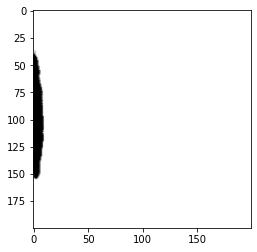

Blowhole


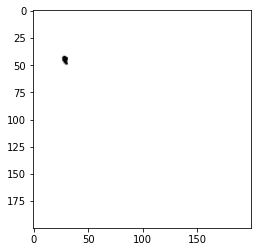

Uneven


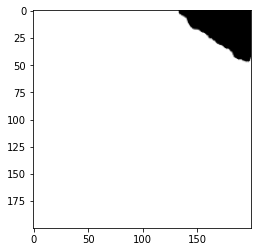

In [31]:
for i in range(3):
    plt.figure()
    digit = FeatTrain[i]
    print(dic[ClassTrain[i]])
    plt.imshow(digit, cmap=plt.cm.binary)
    plt.show()

Looks great! Now we can move on next step to format the normalize the numbers and be ready to put them into our model 

In [33]:
#Making sure our format is correct
FeatTrain = np.array(FeatTrain)
FeatTest = np.array(FeatTest)
ClassTrain = np.array(ClassTrain)
ClassTest = np.array(ClassTest)

In [34]:
#Normalizing data
FeatTrain = FeatTrain/255
FeatTest = FeatTest/255

In [35]:
#Making our labels categorical
ClassTrain = to_categorical(ClassTrain)
ClassTest = to_categorical(ClassTest)

## 3.Modeling

Here we decided to create a neural network with input dimensions **200x200** because our feature array is 200 by 200, and we have 6
labels, so the last layer will have 6 in the `Dense` function.

Let's do it with `1` hidden layer and `12` nodes and run it for `20` loops for now:

In [38]:
network = Sequential()
network.add(Flatten())

network.add(Dense(12, input_dim=200*200, activation='relu'))
network.add(Dense(6, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [39]:
history=network.fit(FeatTrain, ClassTrain, epochs=20,  validation_split=0.1)

Epoch 1/20
10/10 [==============================] - 0s 28ms/step - loss: 1.7524 - accuracy: 0.4345 - val_loss: 1.6896 - val_accuracy: 0.6571
Epoch 2/20
10/10 [==============================] - 0s 9ms/step - loss: 1.6746 - accuracy: 0.5304 - val_loss: 1.6163 - val_accuracy: 0.6571
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 1.6109 - accuracy: 0.5304 - val_loss: 1.5485 - val_accuracy: 0.6571
Epoch 4/20
10/10 [==============================] - 0s 9ms/step - loss: 1.5550 - accuracy: 0.5559 - val_loss: 1.4935 - val_accuracy: 0.6571
Epoch 5/20
10/10 [==============================] - 0s 8ms/step - loss: 1.5086 - accuracy: 0.5559 - val_loss: 1.4480 - val_accuracy: 0.6571
Epoch 6/20
10/10 [==============================] - 0s 9ms/step - loss: 1.4690 - accuracy: 0.5687 - val_loss: 1.4086 - val_accuracy: 0.6571
Epoch 7/20
10/10 [==============================] - 0s 9ms/step - loss: 1.4339 - accuracy: 0.5687 - val_loss: 1.3741 - val_accuracy: 0.6571
Epoch 8/20
10/10 [=

**======================================================================================================================**

As we can see, the accuracy for this model is pretty bad, but we can deepen/widen the network to rise the accuracy.\
This time, we will make it has `3`  hidden layers with `128` nodes, which makes the model become a somewhat deep learning Neural
Network.
**======================================================================================================================**


Just for contrast:\
Image link:\
https://img.securityinfowatch.com/files/base/cygnus/siw/image/2019/02/Figure_01.5c7712513151e.png?auto=format&w=720


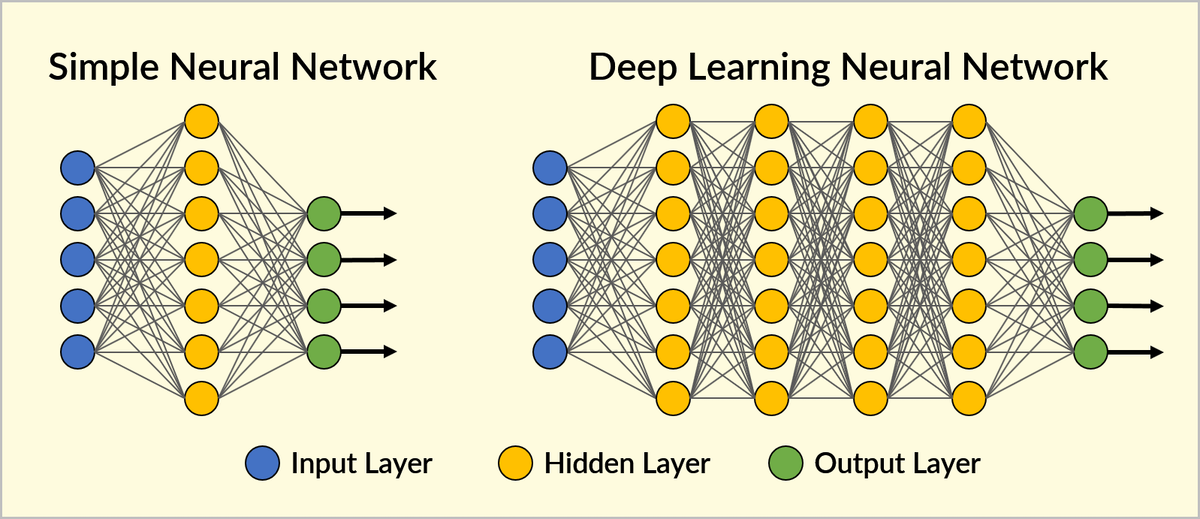

In [89]:
network = Sequential()
network.add(Flatten())

network.add(Dense(128, input_dim=200*200, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(128, activation='relu'))

network.add(Dense(6, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [90]:
history=network.fit(FeatTrain, ClassTrain, epochs=20,  validation_split=0.1)

Epoch 1/20
10/10 [==============================] - 1s 57ms/step - loss: 1.6064 - accuracy: 0.3834 - val_loss: 1.3734 - val_accuracy: 0.6286
Epoch 2/20
10/10 [==============================] - 0s 44ms/step - loss: 1.3629 - accuracy: 0.5304 - val_loss: 1.2279 - val_accuracy: 0.6000
Epoch 3/20
10/10 [==============================] - 0s 47ms/step - loss: 1.2014 - accuracy: 0.5783 - val_loss: 1.0956 - val_accuracy: 0.6571
Epoch 4/20
10/10 [==============================] - 0s 43ms/step - loss: 1.0650 - accuracy: 0.5911 - val_loss: 1.0096 - val_accuracy: 0.6571
Epoch 5/20
10/10 [==============================] - 0s 43ms/step - loss: 0.9621 - accuracy: 0.6070 - val_loss: 0.9898 - val_accuracy: 0.6571
Epoch 6/20
10/10 [==============================] - 0s 42ms/step - loss: 0.8937 - accuracy: 0.6454 - val_loss: 0.8974 - val_accuracy: 0.6571
Epoch 7/20
10/10 [==============================] - 0s 44ms/step - loss: 0.8226 - accuracy: 0.6837 - val_loss: 0.8682 - val_accuracy: 0.6571
Epoch 8/20
10

**======================================================================================================================**
This model is much better than the last one, however, we found out that there's sign of **overfit** in our model around loop
`14` and `18` by looking at the increase in a decrease trend for `val_loss`.\
Since we cannot just determine how much loop we want by looking at the numbers.\
It is time to use visulization to determine how many loops we want to do for our model
**======================================================================================================================**

### visualization of loss and val_loss

The code below plot out the loss and val_loss for each loop:

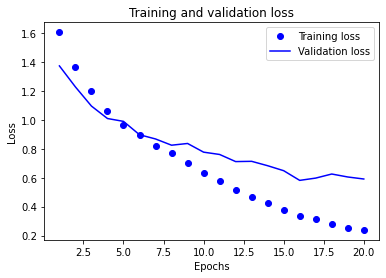

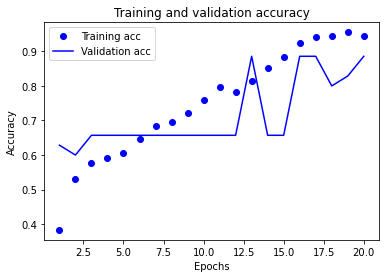

In [91]:
plt.clf()   # clear figure

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs=range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

After some testing and running the model, we got plots:


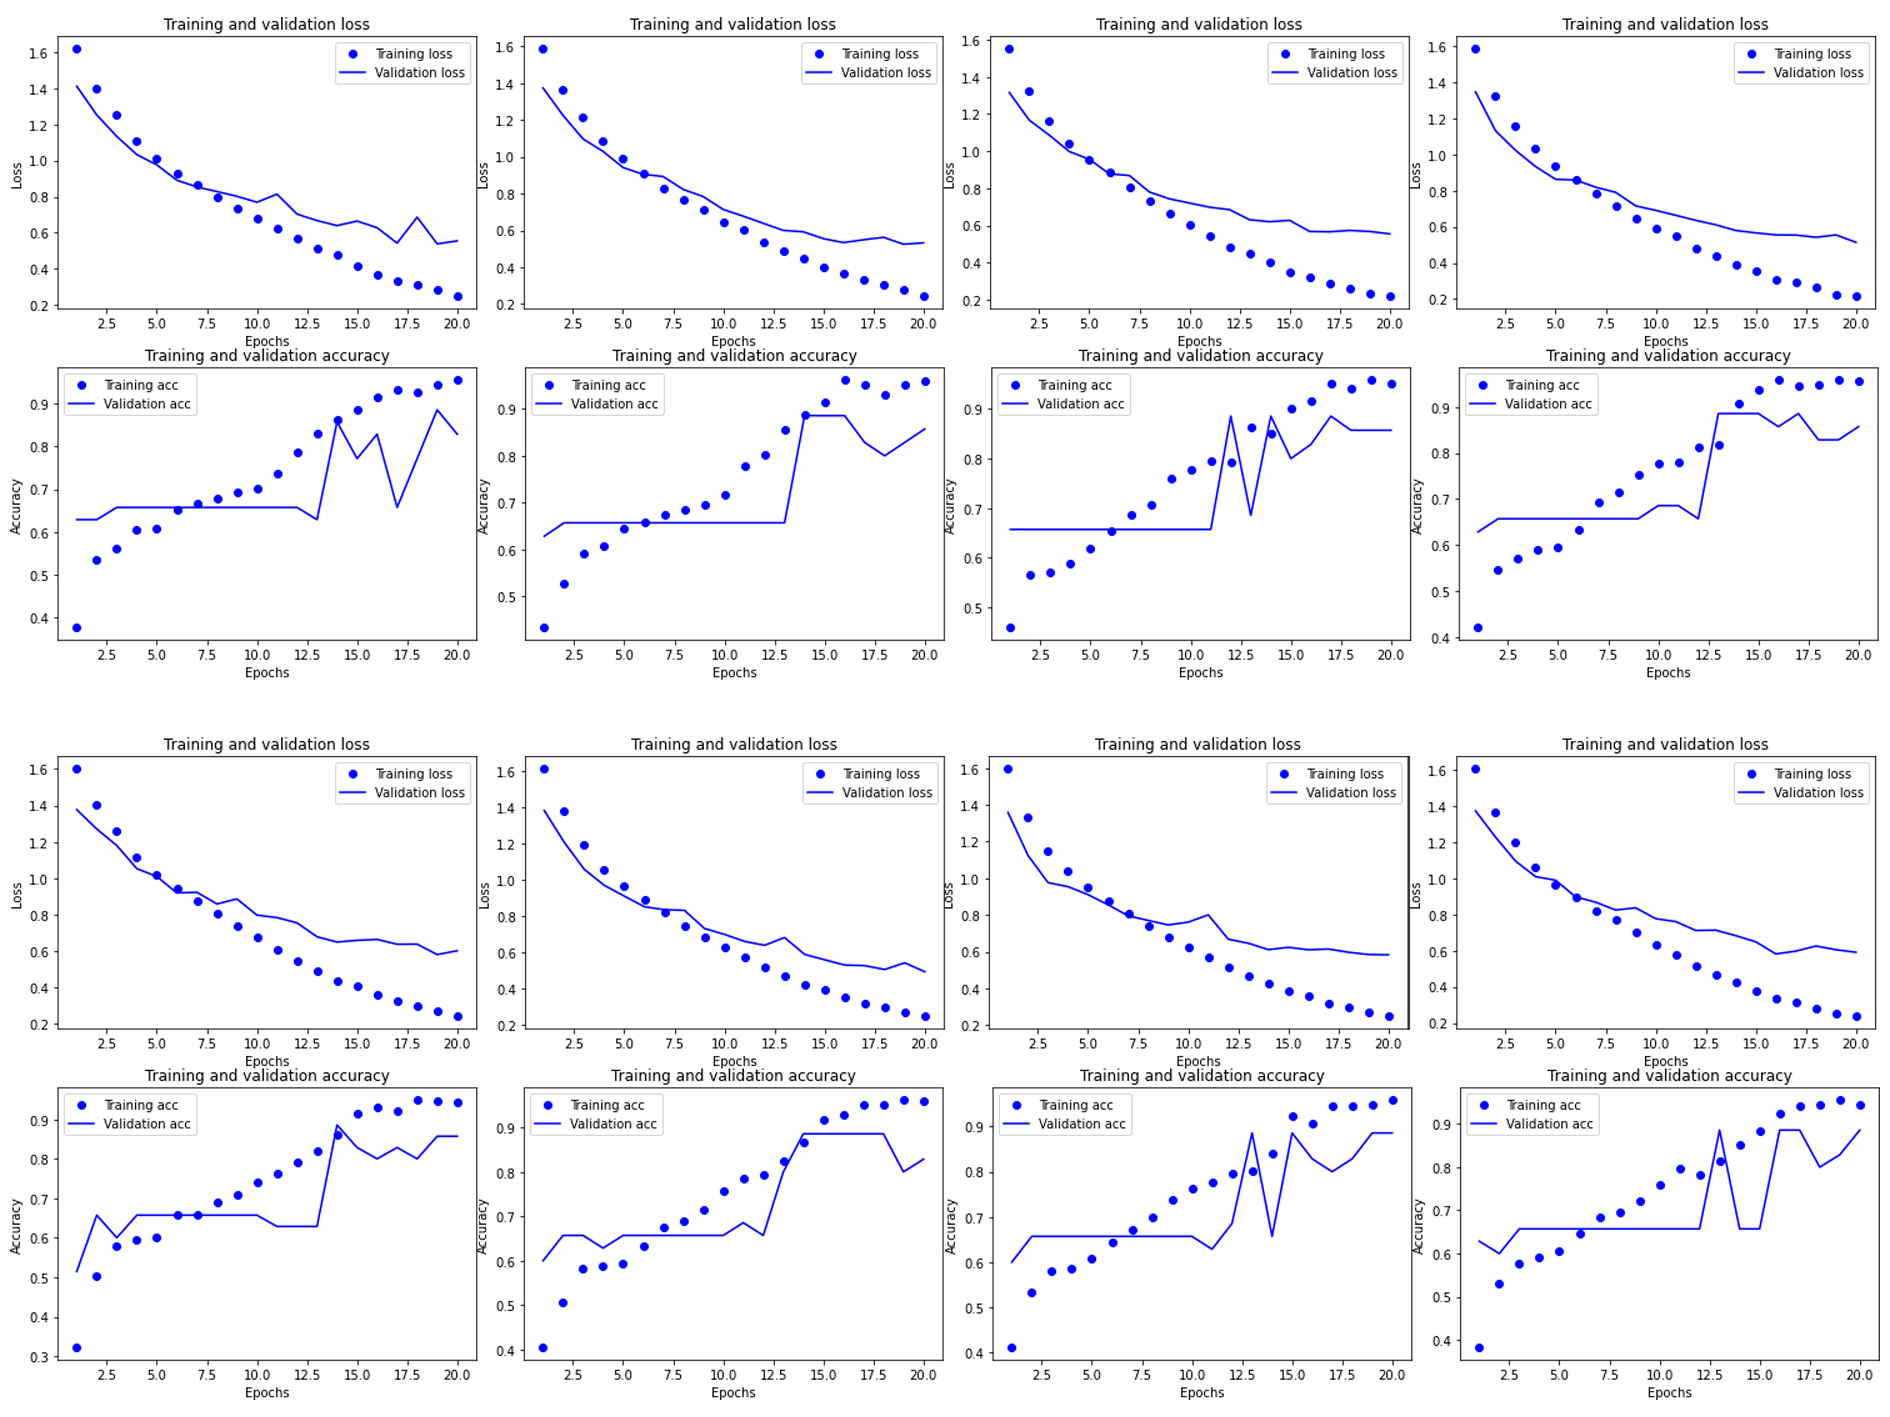


Looking at the plots, we settled with 15 epochs to reduce the risk of overfits, because the validation loss has huge inscrease around loop 12-14,, amd the validation accuracy has a huge increase around 13-14.

And add one more hidden layers just to rise the accuracy a little more.

In [116]:
network = Sequential()
network.add(Flatten())

network.add(Dense(128, input_dim=200*200, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(128, activation='relu'))
network.add(Dense(128, activation='relu'))


network.add(Dense(6, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [117]:
history=network.fit(FeatTrain, ClassTrain, epochs=15,  validation_split=0.1)

Epoch 1/15
10/10 [==============================] - 1s 62ms/step - loss: 1.5475 - accuracy: 0.4313 - val_loss: 1.3256 - val_accuracy: 0.5714
Epoch 2/15
10/10 [==============================] - 0s 44ms/step - loss: 1.3165 - accuracy: 0.5304 - val_loss: 1.1637 - val_accuracy: 0.6571
Epoch 3/15
10/10 [==============================] - 0s 45ms/step - loss: 1.1317 - accuracy: 0.5911 - val_loss: 1.0242 - val_accuracy: 0.6571
Epoch 4/15
10/10 [==============================] - 0s 42ms/step - loss: 0.9825 - accuracy: 0.6070 - val_loss: 1.0688 - val_accuracy: 0.5714
Epoch 5/15
10/10 [==============================] - 0s 43ms/step - loss: 0.8940 - accuracy: 0.6581 - val_loss: 0.9082 - val_accuracy: 0.6571
Epoch 6/15
10/10 [==============================] - 0s 43ms/step - loss: 0.8028 - accuracy: 0.6741 - val_loss: 0.8521 - val_accuracy: 0.6571
Epoch 7/15
10/10 [==============================] - 0s 42ms/step - loss: 0.7045 - accuracy: 0.7284 - val_loss: 0.8102 - val_accuracy: 0.6571
Epoch 8/15
10

Now we are done with building our model and this model should have less hidden danger for overfit , we can print out its test_accuracy

In [119]:
test_loss, test_acc = network.evaluate(FeatTest, ClassTest)
print('test_accuracy:', test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 0.4888 - accuracy: 0.8547
test_accuracy: 0.8547008633613586


## 5.Visualization of the prediction

Let's plot out some of our model's prediction, the code below modifyed from CMSE 202 day 22 ICA:

In [107]:
def plot_gallery(images, true_titles, pred_titles, h, w, n_row=5, n_col=5):
    """Helper function to plot a gallery of portraits, this function takes test features, labels, and model's prediciton
    ,also take in the shape of the feature vector"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray_r)
        
        p_title = dic[np.argmax(pred_titles[i])]
        plt.title('Pred='+p_title , size=9) 
        
        actual_title = dic[np.argmax(true_titles[i])]
        plt.xlabel('Actual='+ actual_title, size=9)
        
        plt.xticks(())
        plt.yticks(())

pred_labels = network.predict(FeatTest)

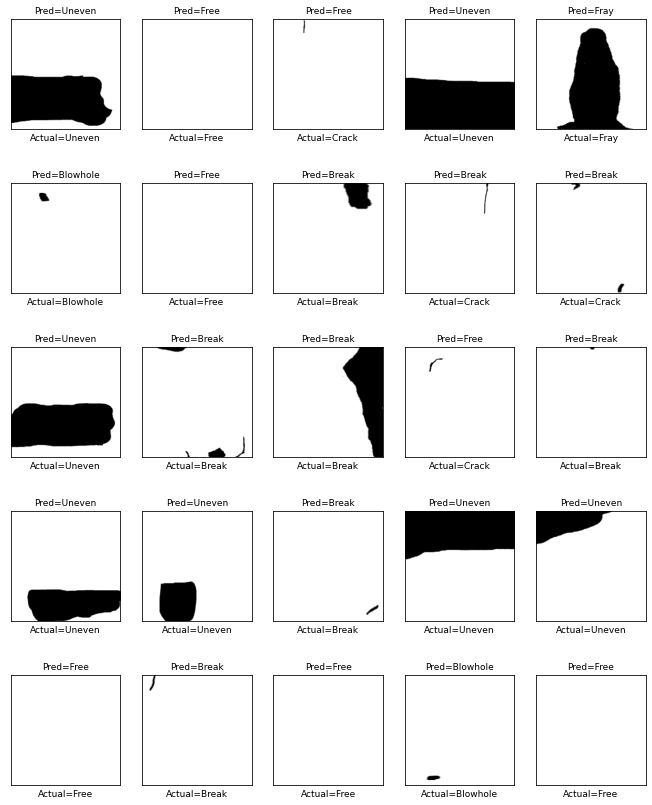

In [108]:
plot_gallery(FeatTest, ClassTest, pred_labels, 200,200)

**======================================================================================================================**

For some of our inaccuracies, we noticed that some of the above tiles that had either a blowhole of break defect were considered to be free / no defect.  However, for most the other defects, we get mostly accurate predictions. We believe this to be the case because the amount of free/no defect tiles in our data set is rather large compared to the tiles with defects.  We tried to limit the amount of free tiles to get accurate results, but keep enough free tiles to be realistic to the real world.

**======================================================================================================================**

Kim, A. (n.d.). Magnetic Tile Surface Defects. Retrieved from https://www.kaggle.com/alex000kim/magnetic-tile-surface-defects/version/1.

Sentdex. (2018, August 18). Loading in your own data - Deep Learning basics with Python, TensorFlow and Keras p.2. Retrieved December 07, 2020, from https://youtu.be/j-3vuBynnOE

Sentdex. (2018, August 19). Convolutional Neural Networks - Deep Learning basics with Python, TensorFlow and Keras p.3. Retrieved December 07, 2020, from https://youtu.be/WvoLTXIjBYU

